In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

11


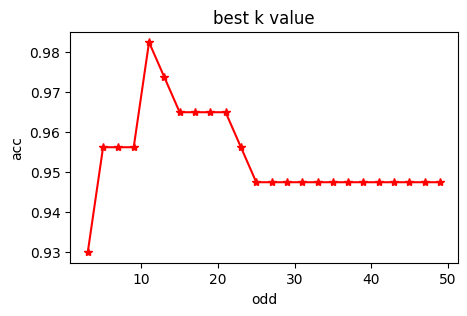

True Positive : 279
True negative : 135
False Positive : 34
False Negative : 7
Train acc 0.9098901098901099
[[135  34]
 [  7 279]]
0.9098901098901099
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       169
           1       0.89      0.98      0.93       286

    accuracy                           0.91       455
   macro avg       0.92      0.89      0.90       455
weighted avg       0.91      0.91      0.91       455

[[37  6]
 [ 0 71]]
0.9473684210526315
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [28]:
class KNN:
  def __init__(self,d):
    try:
      self.df=pd.read_csv(d)
      self.df=self.df.drop(['id','Unnamed: 32'],axis=1)
      self.df['diagnosis']=self.df['diagnosis'].map({'M':0,"B":1}).astype(int)
      self.x=self.df.iloc[:,1:]
      self.y=self.df.iloc[:,0]
      self.x_train,self.x_test,self.y_train,self.y_test=train_test_split(self.x,self.y,test_size=0.2,random_state=42)
    except Exception as e:
      ms,ty,lin=sys.exc_info()
      print(f'{ms} {ty} {lin.tb_lineno}')

  def kvalue(self):
    try:
      odd=np.arange(3,51,2)
      a=[]
      for i in odd:
        self.reg=KNeighborsClassifier(n_neighbors=i)
        self.reg.fit(self.x_train,self.y_train)
        pred=self.reg.predict(self.x_test)
        a.append(accuracy_score(self.y_test,pred))
      print(odd[np.argmax(a)])

      plt.figure(figsize=(5,3))
      plt.title('best k value')
      plt.xlabel('odd')
      plt.ylabel('acc')
      plt.plot(odd,a,color='r',marker='*')
      plt.show()
    except Exception as e:
      ms,ty,lin=sys.exc_info()
      print(f'{ms} {ty} {lin.tb_lineno}')

  def train(self):
    try:
      predictions=self.reg.predict(self.x_train)
      train_data=pd.DataFrame()
      train_data=self.x_train.copy()
      train_data['actual_ans']=self.y_train
      train_data['train_ans']=predictions
      tp=0
      tn=0
      fp=0
      fn=0
      for i in train_data.index:
        if train_data['actual_ans'][i]==0 and train_data['train_ans'][i]==0:
          tn=tn+1
        elif train_data['actual_ans'][i]==1 and train_data['train_ans'][i]==1:
          tp=tp+1
        elif train_data['actual_ans'][i]==0 and train_data['train_ans'][i]==1:
          fp=fp+1
        else:
          fn=fn+1
      print(f'True Positive : {tp}')
      print(f'True negative : {tn}')
      print(f'False Positive : {fp}')
      print(f'False Negative : {fn}')
      print(f'Train acc {(tp+tn)/(tp+tn+fp+fn)}')
      print(confusion_matrix(self.y_train,predictions))
      print(accuracy_score(self.y_train,predictions))
      print(classification_report(self.y_train,predictions))
    except Exception as e:
      ms,ty,lin=sys.exc_info()
      print(f'{ms} {ty} {lin.tb_lineno}')

  def test(self):
    try:
      test_ans=self.reg.predict(self.x_test)
      print(confusion_matrix(self.y_test,test_ans))
      print(accuracy_score(self.y_test,test_ans))
      print(classification_report(self.y_test,test_ans))
    except Exception as e:
      ms,ty,lin=sys.exc_info()
      print(f'{ms} {ty} {lin.tb_lineno}')

if __name__=="__main__":
  obj=KNN('/content/breast-cancer.csv')
  obj.kvalue()
  obj.train()
  obj.test()
